In [3]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### read output logs helper functions

In [4]:
# for chr1 only
def read_hiccups_loop_files(file):
    loop_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
    return(loop_data)

In [5]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate data frame with loop and pairs info

In [27]:
def generate_loop_df():
    loop_data = []
    samples = glob.glob('results/loops/hiccups/*Homo_Sapiens*/')
    for fn in samples:
        
        sample_info = []
        sample_name = fn.split('/')[3]
        sample_info.append(sample_name)
        
        file_path5 = os.path.join(fn, "postprocessed_pixels_5000.bedpe")
        file_path10 = os.path.join(fn, "postprocessed_pixels_10000.bedpe")
        file_path25 = os.path.join(fn, "postprocessed_pixels_25000.bedpe")
        file_path_mpairstat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}.mpairstat".format(sn = sample_name)
        file_path_mergestat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}_allValidPairs.mergestat".format(sn = sample_name)
        
        if os.path.exists(file_path_mpairstat):
            pairs_info = read_hicpro_stats_log(file_path_mpairstat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path_mergestat):
            pairs_info = read_hicpro_stats_log(file_path_mergestat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path5):
            loop_info = read_hiccups_loop_files(file_path5)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path10):
            loop_info = read_hiccups_loop_files(file_path10)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path25):
            loop_info = read_hiccups_loop_files(file_path25)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))    
        loop_data.append(sample_info)
    loop_df = pd.DataFrame(loop_data)
    return loop_df

In [7]:
loop_df = generate_loop_df()
loop_df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (Chr1 Only)", "Number of 10kb Loops (Chr1 Only)", "Number of 25kb Loops (Chr1 Only)"]

#### sort table by Sample Name

In [8]:
loop_df = loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
loop_df

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (Chr1 Only),Number of 10kb Loops (Chr1 Only),Number of 25kb Loops (Chr1 Only)
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,45904302,14233750,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,92276625,23170231,0,0,0
2,293T.GSE128106.Homo_Sapiens.YY1.b1,247695887,24584547,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,165894611,75756233,2,11,124
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,78716891,31654215,1,3,72
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,169061715,71886126,0,1,68
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,103397011,38727933,0,1,31
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,140903561,53019332,1,1,34
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,113738451,41040755,0,0,14
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,100153514,54,203,375


#### sort table by Valid Interaction Pairs (greatest to least)

In [9]:
loop_df = loop_df.sort_values(by=["Valid Interaction Pairs"], ascending=False).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (Chr1 Only),Number of 10kb Loops (Chr1 Only),Number of 25kb Loops (Chr1 Only)
1,DND41-Resistant.GSE173871.Homo_Sapiens.SMC1A.b1,945712643,450158066,364,521,468
2,MyLa.GSE151193.Homo_Sapiens.H3K27ac.b1,736804619,445931504,287,514,601
3,HCC1599-WT.GSE116872.Homo_Sapiens.SMC1A.b1,769438941,405941395,170,382,487
4,Rec1-GSI.GSE116875.Homo_Sapiens.SMC1A.b1,803476313,390265154,0,303,443
5,cbCD34+-HSPC-SJTALL005006-D2.GSE165207.Homo_Sapiens.H3K27ac.b1,637169804,387908947,600,705,540
6,HaCaT_Stimulated.GSE151193.Homo_Sapiens.H3K27ac.b1,630181138,380199595,587,754,626
7,Rec1-WT.GSE116875.Homo_Sapiens.SMC1A.b1,762451158,378396079,217,396,388
8,DND41-Resistant.GSE173871.Homo_Sapiens.SMC1A.b2,813876932,372541441,326,490,472
9,HCC1599-GSI.GSE116872.Homo_Sapiens.SMC1A.b1,725652659,371521572,106,295,494
10,DND41-DMSO.GSE173871.Homo_Sapiens.SMC1A.b1,812330683,369064412,931,1139,822


## Plot HiCCUPS Loops versus Valid Pairs

#### distrubutions of each loop type

count     486.000000
mean      135.467078
std       341.164068
min         0.000000
25%         0.000000
50%        10.000000
75%        89.750000
max      2949.000000
Name: Number of 5kb Loops (Chr1 Only), dtype: float64

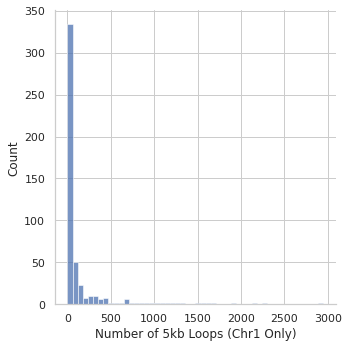

In [10]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 5kb Loops (Chr1 Only)")
loop_df["Number of 5kb Loops (Chr1 Only)"].describe()

count     486.000000
mean      207.930041
std       386.897050
min         0.000000
25%         7.000000
50%        50.000000
75%       222.750000
max      3259.000000
Name: Number of 10kb Loops (Chr1 Only), dtype: float64

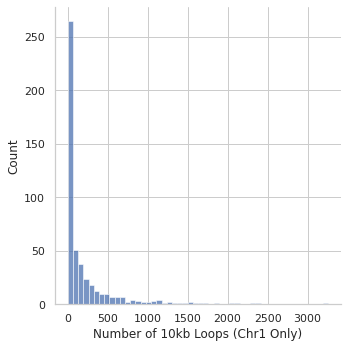

In [11]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 10kb Loops (Chr1 Only)")
loop_df["Number of 10kb Loops (Chr1 Only)"].describe()

count     486.000000
mean      225.358025
std       259.626892
min         0.000000
25%        36.000000
50%       132.000000
75%       329.750000
max      1931.000000
Name: Number of 25kb Loops (Chr1 Only), dtype: float64

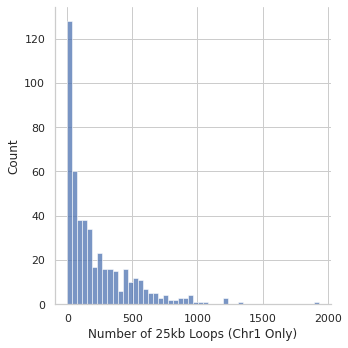

In [12]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 25kb Loops (Chr1 Only)")
loop_df["Number of 25kb Loops (Chr1 Only)"].describe()

In [13]:
np.percentile(loop_df["Number of 5kb Loops (Chr1 Only)"], [10, 25, 50, 75, 99])

array([   0.  ,    0.  ,   10.  ,   89.75, 1739.05])

In [14]:
np.percentile(loop_df["Number of 10kb Loops (Chr1 Only)"], [10, 25, 50, 75, 99])

array([   0.  ,    7.  ,   50.  ,  222.75, 1900.95])

In [15]:
np.percentile(loop_df["Number of 25kb Loops (Chr1 Only)"], [10, 25, 50, 75, 99])

array([   8.  ,   36.  ,  132.  ,  329.75, 1081.15])

#### plot valid interaction pairs vs. number 25kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (Chr1 Only)'>

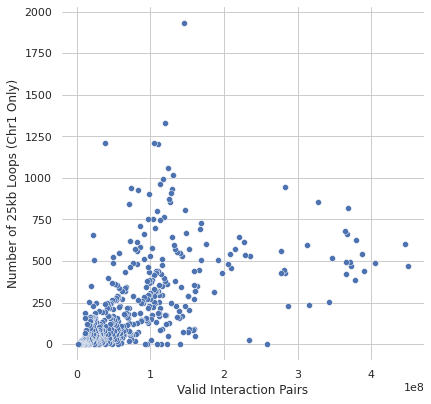

In [16]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (Chr1 Only)",
                data=loop_df,
                ax=ax)

#### plot valid interaction pairs vs. number 10kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (Chr1 Only)'>

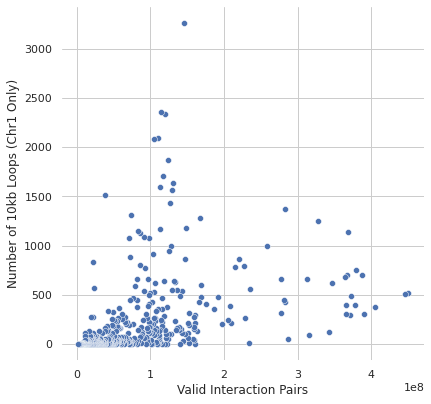

In [17]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (Chr1 Only)",
                data=loop_df,
                ax=ax,
                palette="pastel")

#### plot valid interaction pairs vs. number 5kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (Chr1 Only)'>

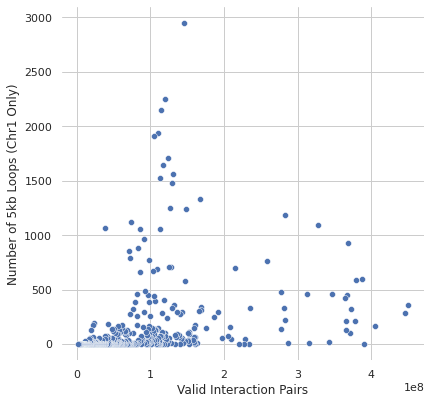

In [18]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (Chr1 Only)",
                data=loop_df,
                ax=ax,
                palette="pastel")

## Plotting Loops versus Valid Pairs using a Soft Threshold

In [19]:
soft_threshold = 2e8
soft_data = loop_df.loc[loop_df['Valid Interaction Pairs'] < soft_threshold]

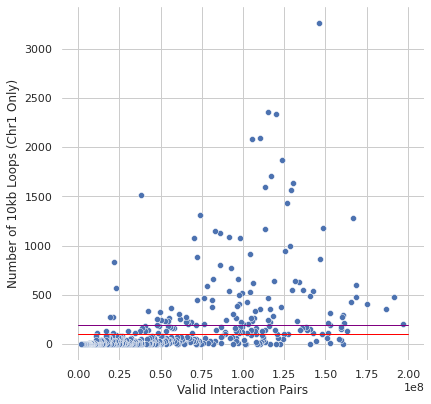

In [20]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (Chr1 Only)",
                data=soft_data,
                ax=ax,
                palette="pastel"
                )
plt.plot([0, 2e8], [100, 100], linewidth=1, color="red")
plt.plot([0, 2e8], [200, 200], linewidth=1, color="purple")

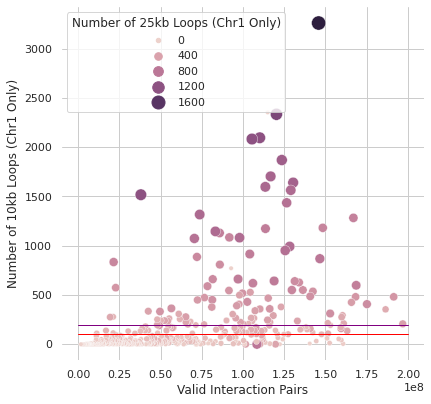

In [21]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (Chr1 Only)",
                data=soft_data,
                ax=ax,
                hue="Number of 25kb Loops (Chr1 Only)",
                size="Number of 25kb Loops (Chr1 Only)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [100, 100], linewidth=1, color="red")
plt.plot([0, 2e8], [200, 200], linewidth=1, color="purple")

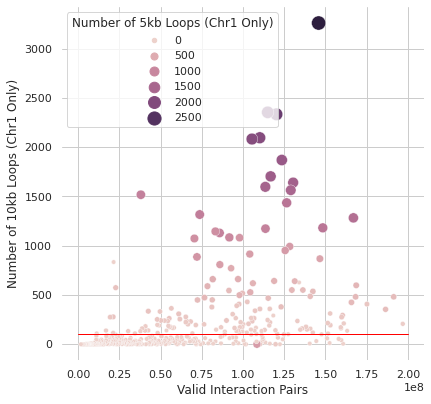

In [22]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (Chr1 Only)",
                data=soft_data,
                ax=ax,
                hue="Number of 5kb Loops (Chr1 Only)",
                size="Number of 5kb Loops (Chr1 Only)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [100, 100], linewidth=1, color="red")

/tmp/ipykernel_129284/904517695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft_data.at[index, 'Number 5kb loops > 100?'] = "no"


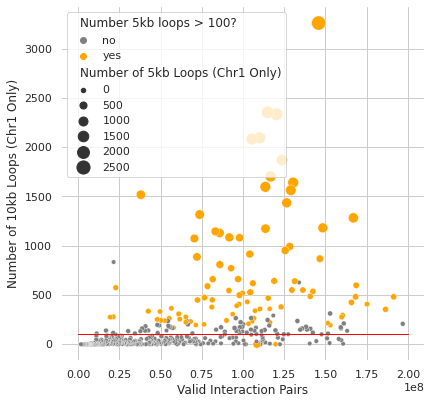

In [23]:
for index, row in soft_data.iterrows():
    if int(row['Number of 5kb Loops (Chr1 Only)']) > 100:
        soft_data.at[index, 'Number 5kb loops > 100?'] = "yes"
    else:
        soft_data.at[index, 'Number 5kb loops > 100?'] = "no"

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (Chr1 Only)",
                data=soft_data,
                ax=ax,
                hue="Number 5kb loops > 100?",
                size="Number of 5kb Loops (Chr1 Only)",
                sizes=(20, 200),
                palette=["gray", "orange"]
                )
plt.plot([0, 2e8], [100, 100], linewidth=1, color="red")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (Chr1 Only)'>

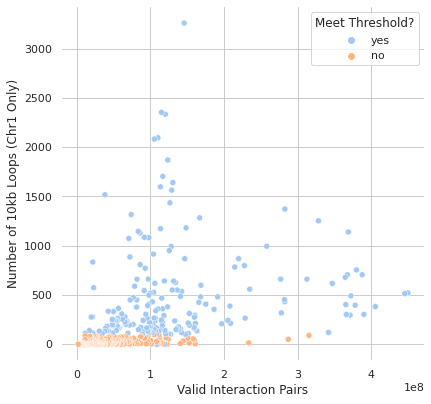

In [24]:
meet_thres = loop_df
for index, row in meet_thres.iterrows():
    if int(row['Number of 5kb Loops (Chr1 Only)']) > 100 or int(row['Number of 10kb Loops (Chr1 Only)']) > 100:
        meet_thres.at[index, 'Meet Threshold?'] = "yes"
    else:
        meet_thres.at[index, 'Meet Threshold?'] = "no"
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (Chr1 Only)",
                data=loop_df,
                ax=ax,
                hue="Meet Threshold?",
                palette="pastel"
                )

### Decided Threshold: >=100 10kb loops OR >=100 5kb loops

## Get Samples that Meet Threshold

In [25]:
meet_thres = meet_thres.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
meet_thres = meet_thres.loc[meet_thres['Meet Threshold?'] == "yes"].reset_index(drop=True)
meet_thres

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (Chr1 Only),Number of 10kb Loops (Chr1 Only),Number of 25kb Loops (Chr1 Only),Meet Threshold?
0,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,100153514,54,203,375,yes
1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,171412471,65258210,119,278,433,yes
2,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,267255826,108090920,19,104,313,yes
3,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1,264799171,106959156,36,138,321,yes
4,A673_WT.GSE133227.Homo_Sapiens.CTCF.b4,147524807,57203051,25,165,341,yes
5,A673_WT.GSE133227.Homo_Sapiens.CTCF.b5,258146361,99574452,25,129,309,yes
6,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,295,481,509,yes
7,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,691966559,151539207,37,109,290,yes
8,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,269649847,138186301,89,177,159,yes
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,277758441,138775067,68,149,201,yes


In [26]:
samplesheet = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/current-post-hicpro-without-header.tsv'
new_samples = 'results/samplesheets/hicpro/2022.08.17.15.48.hicpro.samplesheet.without_header.tsv'
samples_to_run = []

index = 1
with open(new_samples) as ss:
    for line in ss:
        info = line.strip().split()
        sample = info[0]
        if(sample in meet_thres.values):
            samples_to_run.append(str(index))
        index += 1
print(','.join(samples_to_run))
print("length:", len(samples_to_run))

1,2,3,4,5,7,8,9,10,11,12,13,14,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,37,39,40,46
length: 35


# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### generate loop df

In [39]:
thres1_loop_df = generate_loop_df()
thres1_loop_df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (all chrs)", "Number of 10kb Loops (all chrs)", "Number of 25kb Loops (all chrs)"]

#### sort df by sample name

In [40]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,100153514,237,1174,2895
2,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,171412471,65258210,517,1741,3721
3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,267255826,108090920,97,637,2523
4,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1,264799171,106959156,124,794,2490
5,A673_WT.GSE133227.Homo_Sapiens.CTCF.b4,147524807,57203051,112,900,2645
6,A673_WT.GSE133227.Homo_Sapiens.CTCF.b5,258146361,99574452,102,570,2082
7,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,2999,4867,5199
8,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,691966559,151539207,242,1164,2133
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,269649847,138186301,763,1306,1598
10,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,277758441,138775067,577,1149,1846


#### sort df by number of 5kb loops, greatest to least

In [41]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 5kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861
7,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
8,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
9,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,256264966,148369570,11687,11443,6782
10,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215


#### sort df by number of 10kb loops, greatest to least

In [42]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 10kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,H9-HS-KI.GSE105028.Homo_Sapiens.Rad21.b1,199983939,38015306,6291,14321,12906
7,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215
8,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
9,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
10,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861


#### plot loop data

count      190.000000
mean      2729.684211
std       3870.025054
min         25.000000
25%        504.750000
50%       1068.500000
75%       3577.500000
max      27188.000000
Name: Number of 5kb Loops (all chrs), dtype: float64

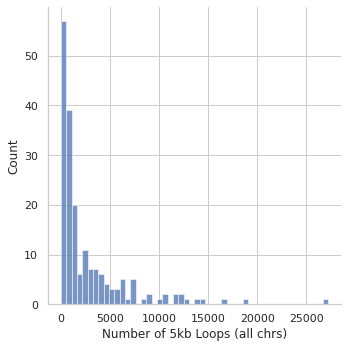

In [43]:
sns.displot(thres1_loop_df, bins=50, x="Number of 5kb Loops (all chrs)")
thres1_loop_df["Number of 5kb Loops (all chrs)"].describe()

count      190.00000
mean      4211.30000
std       4364.82147
min        120.00000
25%       1405.25000
50%       2577.50000
75%       5608.00000
max      32829.00000
Name: Number of 10kb Loops (all chrs), dtype: float64

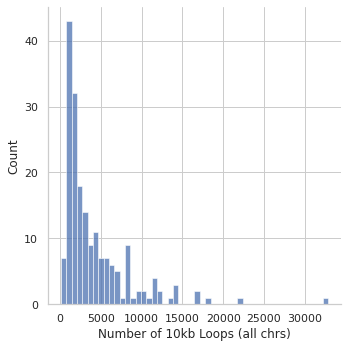

In [44]:
sns.displot(thres1_loop_df, bins=50, x="Number of 10kb Loops (all chrs)")
thres1_loop_df["Number of 10kb Loops (all chrs)"].describe()

count      190.000000
mean      4461.836842
std       2666.763292
min        253.000000
25%       2523.000000
50%       4116.500000
75%       5567.500000
max      20182.000000
Name: Number of 25kb Loops (all chrs), dtype: float64

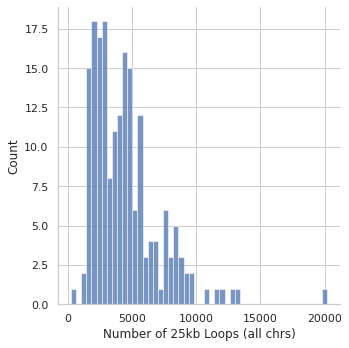

In [45]:
sns.displot(thres1_loop_df, bins=50, x="Number of 25kb Loops (all chrs)")
thres1_loop_df["Number of 25kb Loops (all chrs)"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (all chrs)'>

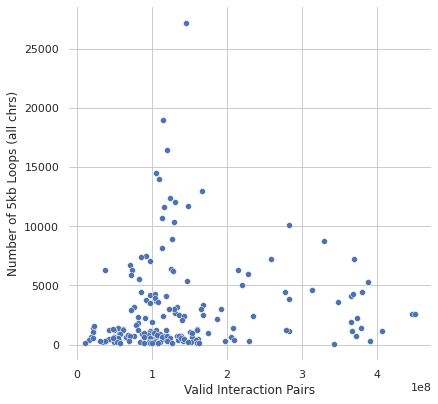

In [46]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (all chrs)'>

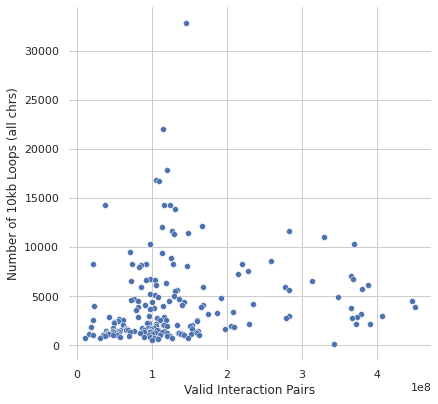

In [47]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (all chrs)'>

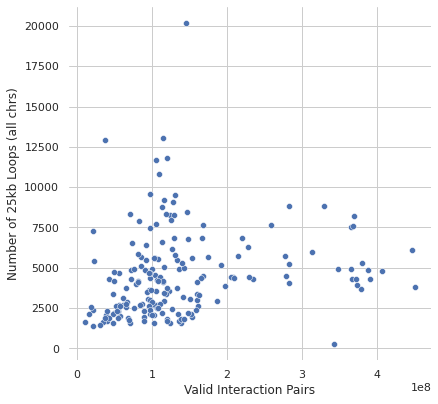

In [48]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)